In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Решение нелинейных уравнений методом продолжения по параметру.

Решим нелинейное уравнение
$$
\frac{x^3}{e^x} + 3=0
$$

In [ ]:
def nonLinearFunction(x):
  return x**3/np.exp(x) + 3

In [ ]:
def derrNonLinearFunction(x):
  return (3*x**2 - x**3)/np.exp(x)

In [ ]:
x = np.linspace(-3,3,100)

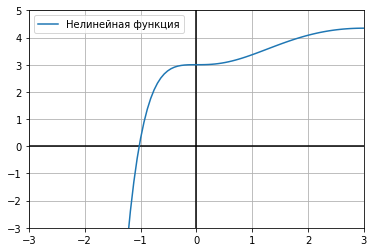

In [ ]:
plt.plot(x,nonLinearFunction(x))
plt.vlines(0,-3,5)
plt.hlines(0,-3,3)
plt.ylim(-3,5)
plt.xlim(-3,3)
plt.grid()
plt.legend(['Нелинейная функция'])

Рассмотрим функцию гомотопии:
$$
$$
\begin{equation*}H(p, \lambda) = f(x) − (1 − \lambda)f(x_0)\end{equation*}
$$
$$
После ее дифференцирования по параметру, при равенстве левой части нулю, получаем задачу Коши:
$$
$$
\begin{equation*}
 \begin{cases}
   \frac{dx}{d\lambda}=-[\frac{df}{dx}]^{-1}f(x_0)\\
   x(\lambda)|_{\lambda=0}=x_0
 \end{cases}
\end{equation*}
$$
$$
Она сводится к итеративному процессу, в результате которого находится решение нелинейного уравнения

In [ ]:
def homotopyMethod(x0):

  #число шагов для метода
  S = 10000

  #шаг
  h = 1/S

  #значение функции в начальной точке
  f0 = nonLinearFunction(x0)

  #первое значение параметра
  lk = 0

  xk = x0
  xkprev = x0
  
  #запускаем итеративный процесс, пока не параметр не станет равным 1
  for k in range(S):
    lk = lk + h
    dfk = derrNonLinearFunction(xk)
    xk = xkprev - h*f0/dfk
    xkprev = xk

  return xk

In [ ]:
homotopyMethod(-1)

-1.024881545058451

In [ ]:
nonLinearFunction(-1.024887591013923)

-7.236136697041928e-05

Решим теперь систему нелинейных уравнений
$$
$$
\begin{equation*}
 \begin{cases}
   x_1ln(x_2)-\frac{1}{x_2}=0\\
   x_2 - e^{2x_1}=0
 \end{cases}
\end{equation*}
$$
$$

In [15]:
def fun1(x1,x2):
  return x1*np.log(x2) - 1/x2

In [16]:
def dfun1x1(x1,x2):
  return np.log(x2)

In [19]:
def dfun1x2(x1,x2):
  return x1/x2 + 1/(x2**2)

In [17]:
def fun2(x1,x2):
  return x2 - np.exp(2*x1)

In [18]:
def dfun2x1(x1,x2):
  return -2*np.exp(2*x1)

In [20]:
def dfun2x2(x1,x2):
  return 1

In [47]:
def fun1_4show(x2):
  return (1/(x2*np.log(x2)))

In [48]:
def fun2_4show(x2):
  return np.log(x2)/2

In [2]:
def jacobianDet(x1,x2):
  return dfun1x1(x1,x2)*dfun2x2(x1,x2) - dfun1x2(x1,x2)*dfun2x1(x1,x2)

In [38]:
def jacobianObr(x1,x2):
  return [[dfun2x2(x1,x2)/jacobianDet(x1,x2),-dfun1x2(x1,x2)/jacobianDet(x1,x2)],
          [-dfun2x1(x1,x2)/jacobianDet(x1,x2),dfun1x1(x2,x2)/jacobianDet(x1,x2)]]

In [45]:
x = np.linspace(0.25,4,100)

Text(0, 0.5, 'x1')

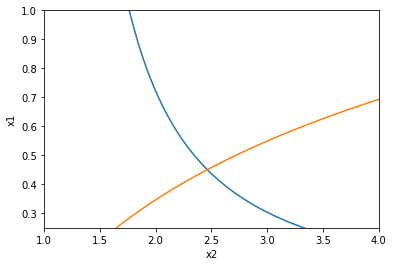

In [49]:
plt.plot(x,fun1_4show(x))
plt.plot(x,fun2_4show(x))
plt.xlim(1,4)
plt.ylim(0.25,1)
plt.xlabel('x2')
plt.ylabel('x1')
#начальное приближение - (0.45,2.5)

In [ ]:
print(fun1(0.44,2.46))
print(fun2(0.44,2.46))

-0.01043307106517094
0.04910029358279022


In [11]:
def matrixMultVector(m,v):
  retVal = [0,0]
  for m_r in range(0,len(m)):
    for m_c in range(0,len(m)):
      retVal[m_r] += m[m_r][m_c]*v[m_c] 
  return retVal

In [55]:
def homotopyMethodSystem(x0):

  #число шагов для метода
  S = 1000

  #шаг
  h = 1/S

  #значение функции в начальной точке
  f0 = [fun1(x0[0],x0[1]),fun2(x0[0],x0[1])]
  print(f0)

  #первое значение параметра
  lk = 0

  xk = x0
  xkprev = x0
  
  #запускаем итеративный процесс, пока не параметр не станет равным 1
  for k in range(S):
    lk = lk + h
    detJ = jacobianDet(xk[0],xk[1])
    ftemp = [(h)*f0[0],(h)*f0[1]]
    ftemp = matrixMultVector(jacobianObr(xk[0],xk[1]),ftemp)
    xk = [xkprev[0] - ftemp[0],xkprev[1] - ftemp[1]]
    xkprev = xk

  return xk

In [56]:
solve = homotopyMethodSystem([0.45,2.5])

[0.012330829343369765, 0.04039688884305015]


In [57]:
print(fun1(solve[0], solve[1]))
print(fun2(solve[0], solve[1]))

-1.5209758136291995e-07
-1.7802803675692758e-09


Литература:

---
Э. И. Григолюк, В. И. Шалашилин, Метод продолжения по параметру в задачах нелинейного
деформирования стержней, пластин и оболочек,
Исслед. по теор. пластин и оболочек, 1984, выпуск 17, часть 1, 3–58

Жулин С.С. Метод продолжения по параметру с коррекцией и его приложения

Hector Vazquez-Leal Generalized Homotopy Method for Solving Nonlinear Differential Equations
